<a href="https://colab.research.google.com/github/vamssetti/Horse_or_Human_classification_of_Image_using_CNN/blob/main/Horse_or_Human_classification_of_Image_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import os

In [24]:
dataset,info = tfds.load('horses_or_humans',with_info=True,as_supervised=True)
class_names= info.features['label'].names

In [25]:
for i, example in enumerate(dataset['train']):
    image,label=example[0],example[1]
    save_dir = './horse-or-human/train/{}'.format(class_names[label])
    os.makedirs(save_dir,exist_ok=True)
    filename = '{}_{}.jpg'.format(class_names[label],i)
    filepath = save_dir+'/'+filename
    tf.keras.preprocessing.image.save_img(filepath,image)
    #break
for i, example in enumerate(dataset['test']):
    image,label=example[0],example[1]
    save_dir = './horse-or-human/test/{}'.format(class_names[label])
    os.makedirs(save_dir,exist_ok=True)
    filename = '{}_{}.jpg'.format(class_names[label],i)
    filepath = save_dir+'/'+filename
    tf.keras.preprocessing.image.save_img(filepath,image)
    #break

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_dir='/content/horse-or-human/train'
image_size=(300,300)
batch_size=25

train_datagen = ImageDataGenerator(rescale = 1/255)
train_genarator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)
test_dir='/content/horse-or-human/test'
image_size=(300,300)
batch_size=25
test_datagen = ImageDataGenerator(rescale = 1/255)
test_genarator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [28]:
train_genarator.class_indices

{'horses': 0, 'humans': 1}

In [29]:
#data visuvalisation
import matplotlib.pyplot as plt
import matplotlib.image as mping

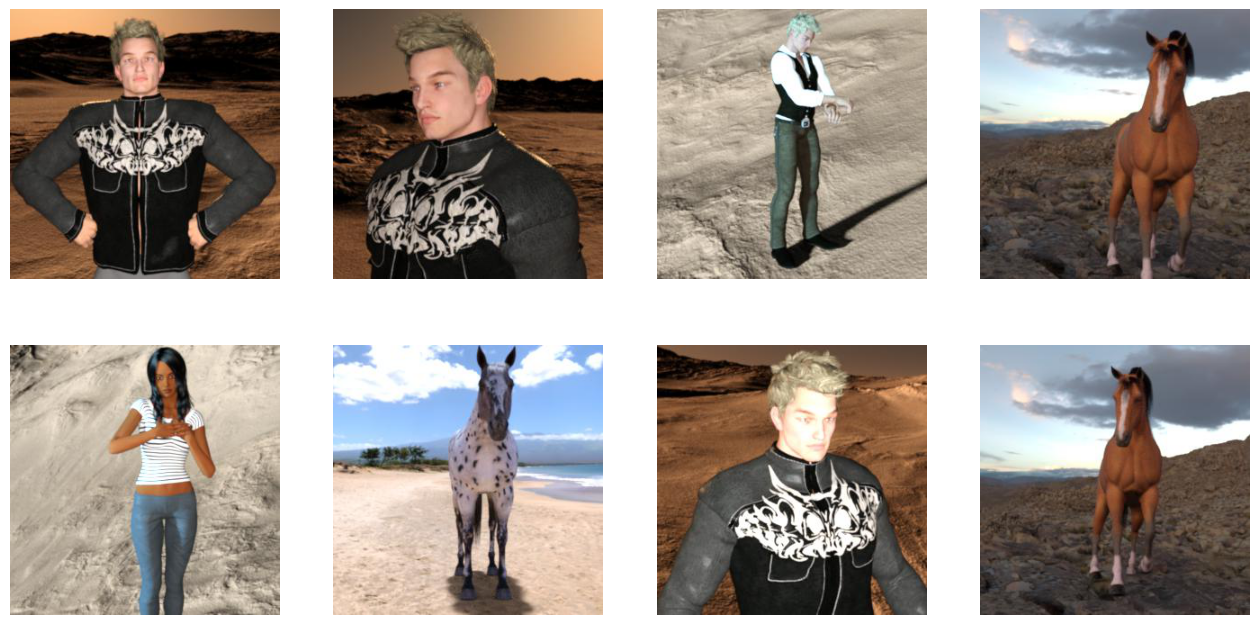

In [30]:
nrow =2
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrow*4)
next_batch = train_genarator.next()
for i in range(0,ncols*nrow):
  ax = plt.subplot(nrow,ncols,i+1)
  ax.axis('off')
  plt.imshow(next_batch[0][i])
plt.show()

In [31]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam

In [32]:
def get_model():
  model = Sequential()
  #1st layer
  model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu', input_shape=(300,300,3)))
  model.add(MaxPool2D(pool_size=2))
  #2nd layer
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
  model.add(MaxPool2D(pool_size=2))
  #3rd layer
  model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
  model.add(MaxPool2D(pool_size=2))
  #Flatten layer and  FCN
  model.add(Flatten())
  model.add(Dense(512,activation = 'relu'))
  model.add(Dense(1,activation='sigmoid'))
  return model



In [33]:
model= get_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 128)     

In [ ]:
adam= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit_generator(train_genarator,epochs=5,validation_data=test_genarator)

Epoch 1/5


<ipython-input-34-9dbeaba3d9c9>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_genarator,epochs=5,validation_data=test_genarator)


42/42 [==============================] - 323s 8s/step - loss: 0.7202 - accuracy: 0.8384 - val_loss: 2.2732 - val_accuracy: 0.6406
Epoch 2/5
42/42 [==============================] - 310s 7s/step - loss: 0.0408 - accuracy: 0.9873 - val_loss: 2.2915 - val_accuracy: 0.8125
Epoch 3/5
42/42 [==============================] - 313s 7s/step - loss: 0.0256 - accuracy: 0.9942 - val_loss: 2.8681 - val_accuracy: 0.7383
Epoch 4/5
42/42 [==============================] - 305s 7s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.8707 - val_accuracy: 0.7500
Epoch 5/5
42/42 [==============================] - ETA: 0s - loss: 1.5059e-04 - accuracy: 1.0000

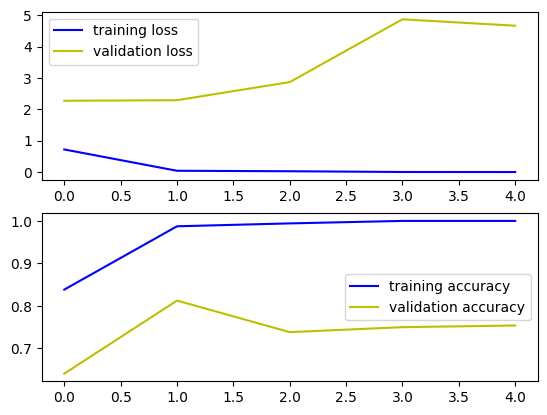

In [41]:
#plot loss and accuracy curve
fix,ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='b', label='training loss')
ax[0].plot(history.history['val_loss'],color ='y',label='validation loss')
ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'],color='b', label='training accuracy')
ax[1].plot(history.history['val_accuracy'],color ='y',label='validation accuracy')
ax[1].legend(loc='best')


In [43]:
model.save('horse-or-human.h5')

In [45]:
#load model
from tensorflow.keras.models import load_model
model_load = load_model('horse-or-human.h5')

In [53]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/content/horse-or-human/test/horses/horses_112.jpg',target_size = image_size)
img = image.img_to_array(img)
img = np.expand_dims(img,axis =0)
img = img/255

#prediction
predict= model_load.predict(img)
print(predict)
TH =0.5
predictied_class = int(predict[0][0]>TH)
class_indices = train_genarator.class_indices
labels = {v:k for k,v in class_indices.items()}
labels[predictied_class]


1/1 [==============================] - 0s 316ms/step
[[0.01822912]]


'horses'